<a href="https://colab.research.google.com/github/joanizba/Aguacate-IA/blob/main/Puntos_2_4_y_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import avocado_regions as ar
data = pd.read_csv('avocado.csv')
data


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [2]:
df = data.copy()
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

df['category_region'] = df['region'].transform(lambda x: ar.get_truly_region(x))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,category_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


In [3]:
media = df['Total Volume'].mean()
std = df['Total Volume'].std()

# Definir límites
Q1 = df['Total Volume'].quantile(0.25)
Q3 = df['Total Volume'].quantile(0.75)
IQR = Q3 -Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los datos sin outliers
df = df[(df['Total Volume'] >= limite_inferior) & (df['Total Volume'] <= limite_superior)]
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,category_region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


2.

2.1

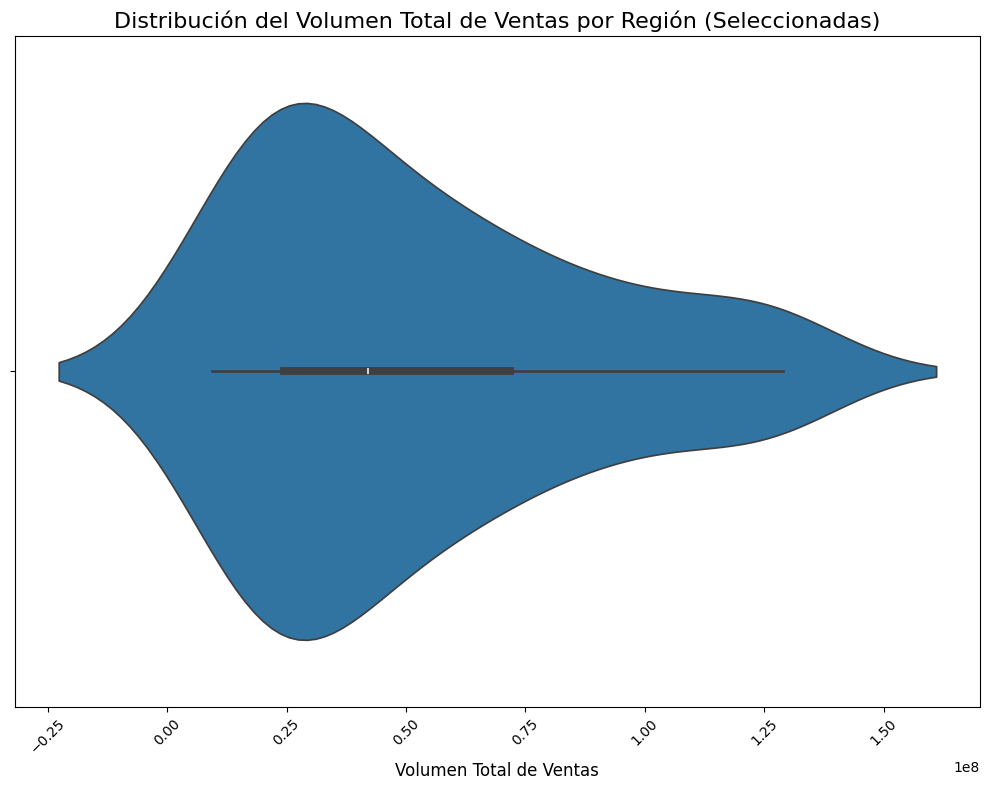

In [4]:
volume = df[['region','Total Volume']].groupby('region').sum().reset_index()


plt.figure(figsize=(10, 8))
sns.violinplot(
    x=volume['Total Volume'],
)

plt.title('Distribución del Volumen Total de Ventas por Región (Seleccionadas)', fontsize=16)

plt.xlabel('Volumen Total de Ventas', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas

# Mostrar el gráfico
plt.tight_layout()
plt.show()


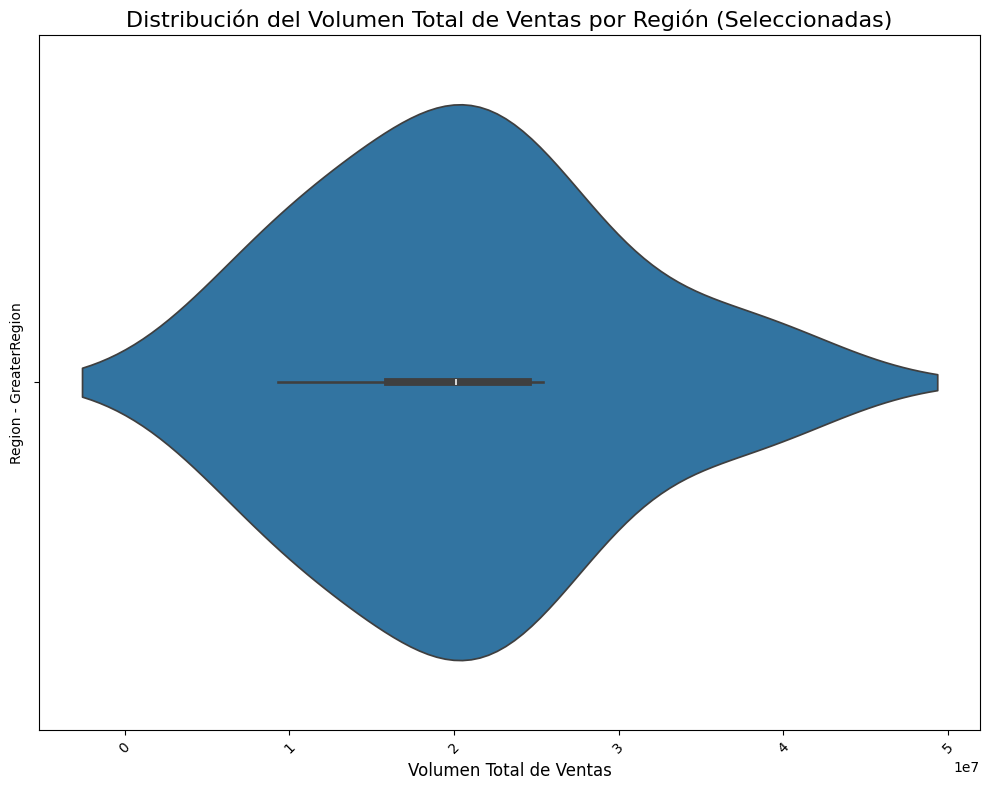

In [5]:
select_region = df[df['category_region']=='GreaterRegion']
volume_region = select_region[['region','Total Volume']].groupby('region').sum().reset_index()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x=volume_region['Total Volume'],
)

plt.title('Distribución del Volumen Total de Ventas por Región (Seleccionadas)', fontsize=16)
plt.xlabel('Volumen Total de Ventas', fontsize=12)
plt.ylabel('Region - GreaterRegion')
plt.xticks(rotation=45, fontsize=10)  # Rotar etiquetas

# Mostrar el gráfico
plt.tight_layout()
plt.show()

2.2

<ipython-input-6-81601d73ca1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['Date']).dt.year


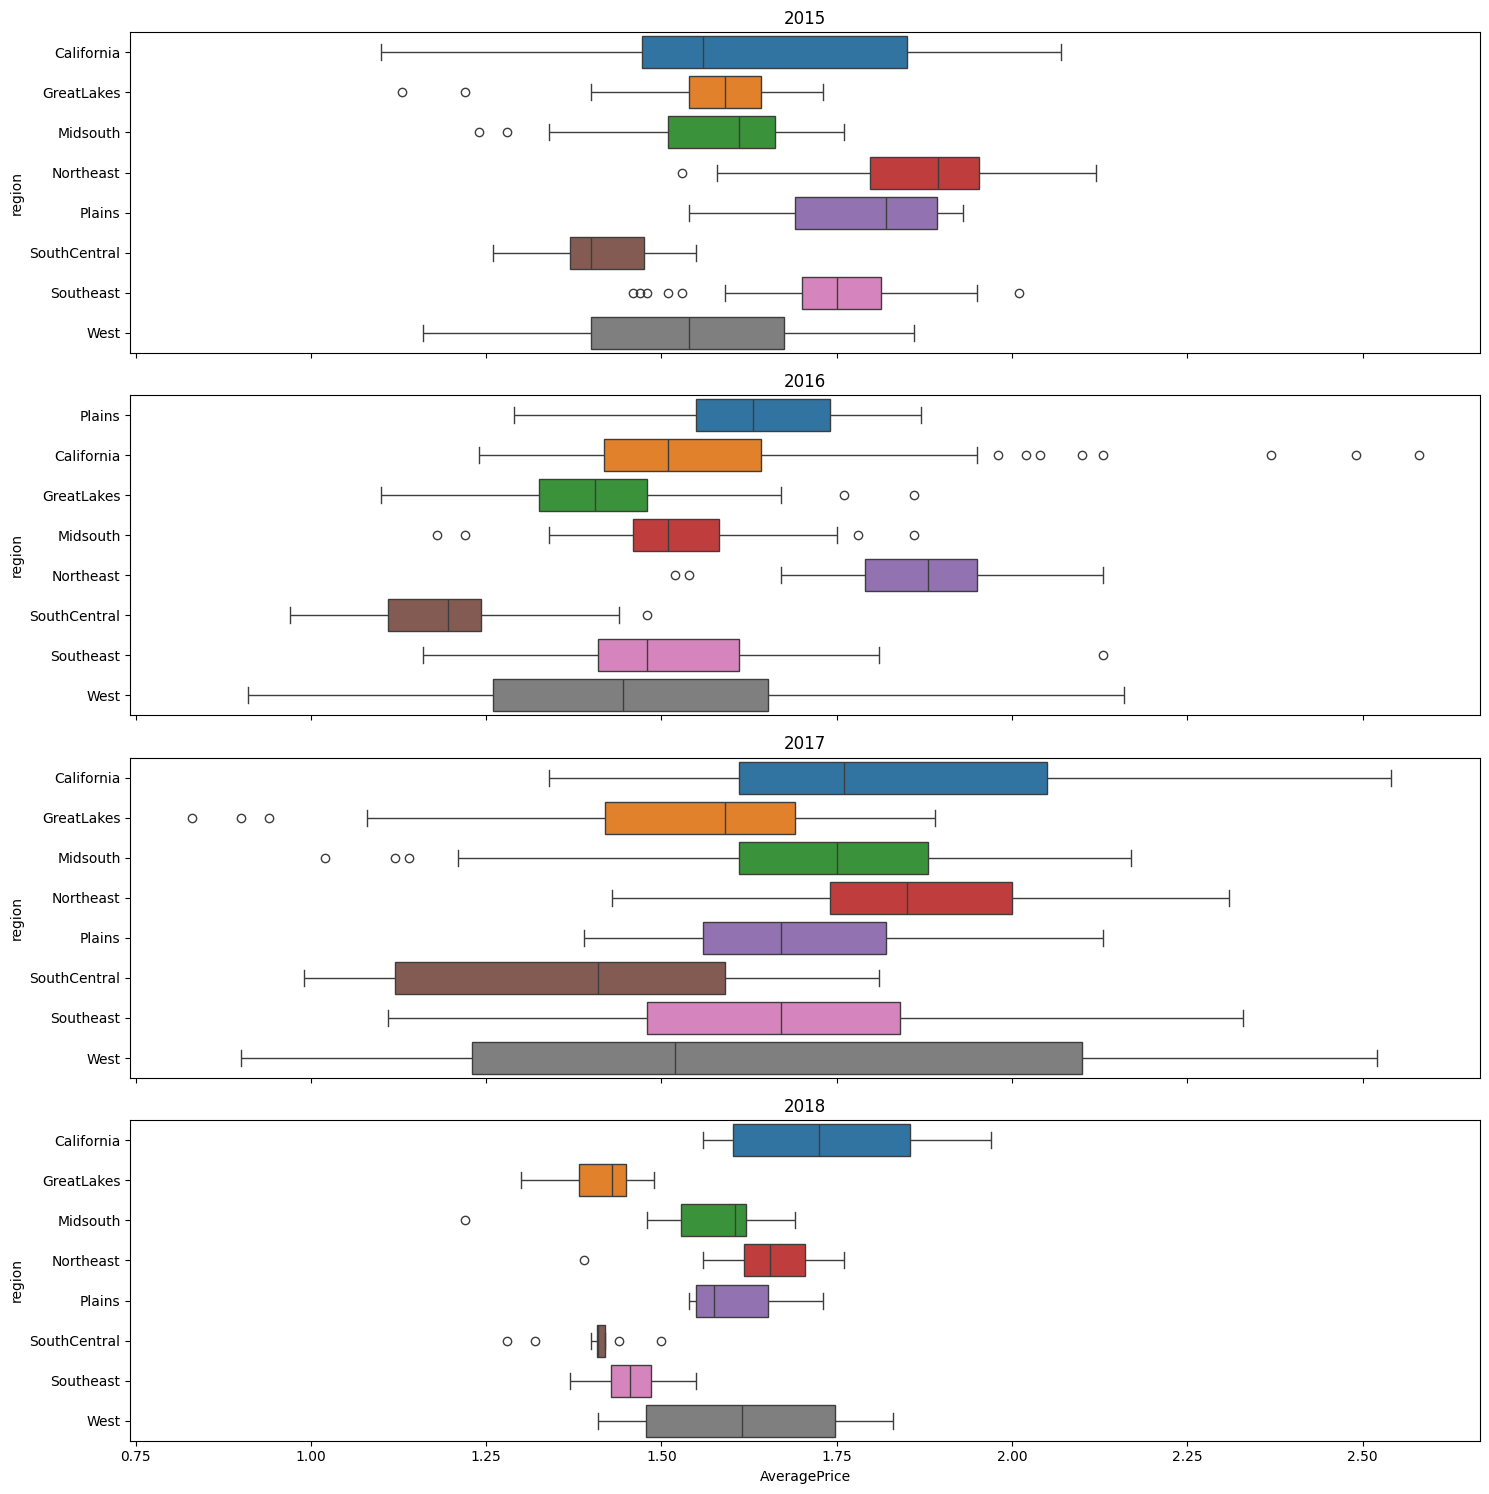

In [6]:
df['year'] = pd.to_datetime(df['Date']).dt.year

price_yr = select_region[['AveragePrice','year','region']]

yr_2015 = price_yr[price_yr['year']==2015][['region','AveragePrice']]
yr_2016 = price_yr[price_yr['year']==2016][['region','AveragePrice']]
yr_2017 = price_yr[price_yr['year']==2017][['region','AveragePrice']]
yr_2018 = price_yr[price_yr['year']==2018][['region','AveragePrice']]

fig, axs = plt.subplots(4, 1, figsize=(15, 16), sharex=True )
#2015
sns.boxplot(data=yr_2015, y='region', x='AveragePrice', hue='region', ax=axs[0])
axs[0].set_title('2015')
#2016
sns.boxplot(data=yr_2016, y='region', x='AveragePrice', hue='region', ax=axs[1])
axs[1].set_title('2016')
#2017
sns.boxplot(data=yr_2017, y='region', x='AveragePrice', hue='region', ax=axs[2])
axs[2].set_title('2017')
#2018
sns.boxplot(data=yr_2018, y='region', x='AveragePrice', hue='region', ax=axs[3])
axs[3].set_title('2018')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

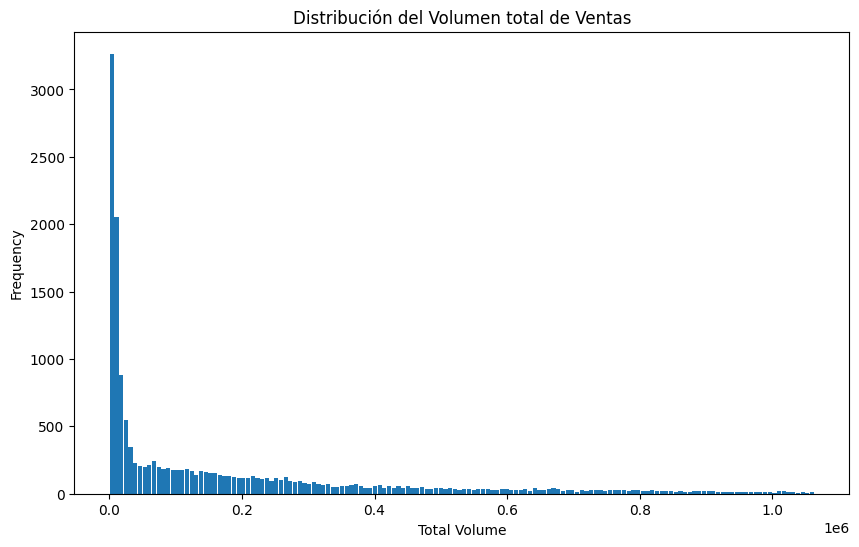

In [7]:
plt.figure(figsize=(10,6))
df['Total Volume'].plot.hist(bins=150,rwidth=0.90)
plt.title('Distribución del Volumen total de Ventas')
plt.xlabel('Total Volume')
plt.show()

Text(0.5, 0, 'Total Volume')

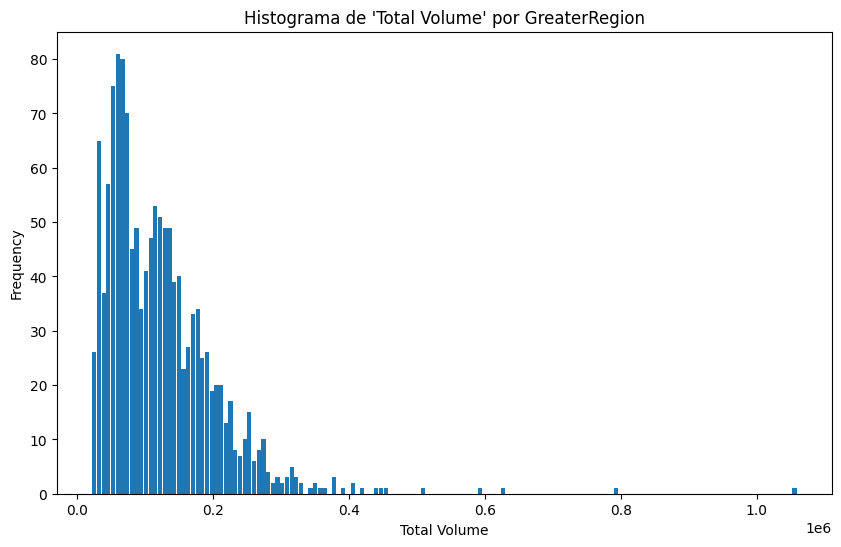

In [8]:
plt.figure(figsize=(10,6))
select_region['Total Volume'].plot.hist(bins=150, rwidth=0.90)
plt.title('Histograma de \'Total Volume\' por GreaterRegion')
plt.xlabel('Total Volume')

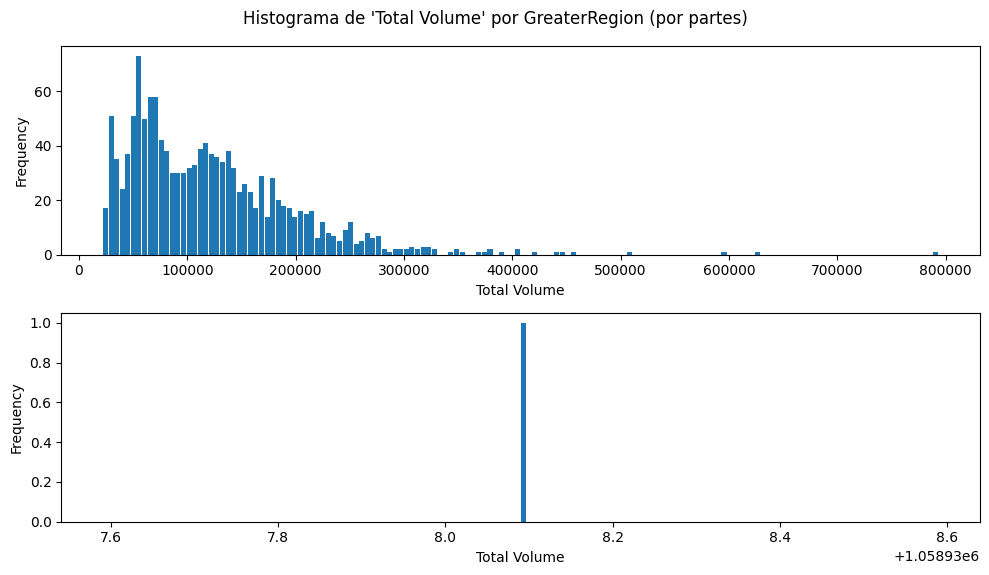

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=False)
valor_umbral = 0.1e7
select_region_izda = select_region[select_region['Total Volume']<valor_umbral]
select_region_dcha = select_region[select_region['Total Volume']>valor_umbral]

select_region_izda['Total Volume'].plot.hist(bins=150, rwidth=0.90, ax=axs[0])
select_region_dcha['Total Volume'].plot.hist(bins=150, rwidth=0.90, ax=axs[1])

fig.suptitle('Histograma de \'Total Volume\' por GreaterRegion (por partes)')
axs[0].set_xlabel('Total Volume')
axs[1].set_xlabel('Total Volume')
plt.tight_layout(rect=[0, 0.03, 1, 1])

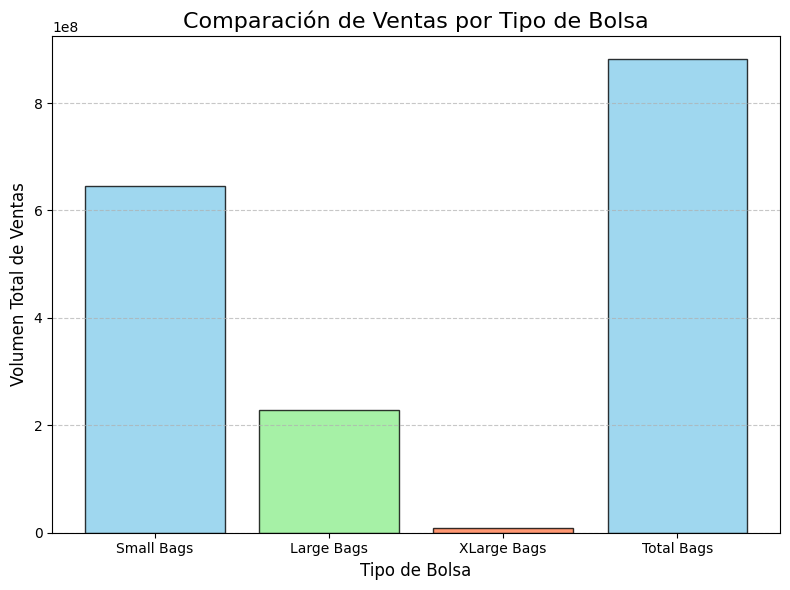

In [10]:
bolsas_totales = {
    'Small Bags': df['Small Bags'].sum(),
    'Large Bags': df['Large Bags'].sum(),
    'XLarge Bags': df['XLarge Bags'].sum(),
    'Total Bags': df['Total Bags'].sum()
}

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(bolsas_totales.keys(), bolsas_totales.values(), color=['skyblue', 'lightgreen', 'coral'], alpha=0.8, edgecolor='black')
plt.title('Comparación de Ventas por Tipo de Bolsa', fontsize=16)
plt.xlabel('Tipo de Bolsa', fontsize=12)
plt.ylabel('Volumen Total de Ventas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

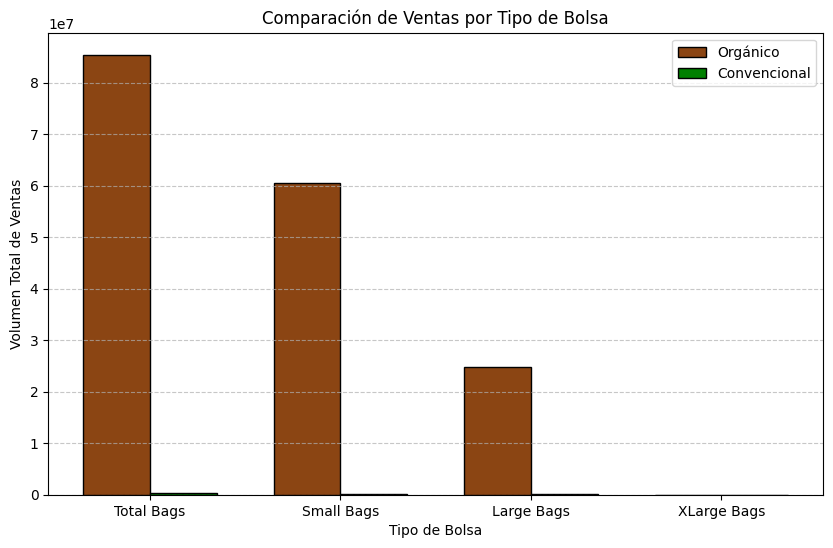

In [11]:
ag_conv = select_region_dcha[['Total Bags','Small Bags','Large Bags','XLarge Bags']]
ag_org = select_region_izda[['Total Bags','Small Bags','Large Bags','XLarge Bags']]


bolsas_totales_conv = {
    'Total Bags': ag_conv['Total Bags'].sum(),
    'Small Bags': ag_conv['Small Bags'].sum(),
    'Large Bags': ag_conv['Large Bags'].sum(),
    'XLarge Bags': ag_conv['XLarge Bags'].sum()
}

bolsas_totales_org = {
    'Total Bags': ag_org['Total Bags'].sum(),
    'Small Bags': ag_org['Small Bags'].sum(),
    'Large Bags': ag_org['Large Bags'].sum(),
    'XLarge Bags': ag_org['XLarge Bags'].sum()
}

bags_types = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
'''bags_sales_conv = list(map(lambda item: item[1], bolsas_totales_conv.items()))
bags_sales_org = list(map(lambda item: item[1], bolsas_totales_org.items()))'''


bar_width = 0.35
index = np.arange(len(bags_types))


plt.figure(figsize=(10, 6))
plt.bar(index - bar_width / 2, bolsas_totales_org.values(), bar_width, color='saddlebrown', edgecolor='black', label='Orgánico')
plt.bar(index + bar_width / 2, bolsas_totales_conv.values(), bar_width, color='green', edgecolor='black',  label='Convencional')
plt.title('Comparación de Ventas por Tipo de Bolsa')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Volumen Total de Ventas')
plt.legend()
plt.xticks(index, bags_types)
plt.grid(axis='y', linestyle='--', alpha=0.7)

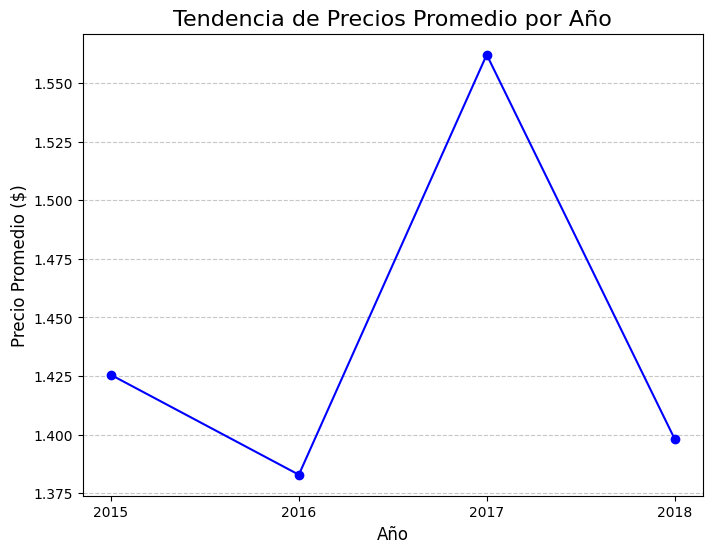

In [12]:
promedio_precio_por_año = df.groupby('year')['AveragePrice'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(promedio_precio_por_año.index, promedio_precio_por_año.values, marker='o', linestyle='-', color='blue', label='Precio Promedio')

# Personalización del gráfico
plt.title('Tendencia de Precios Promedio por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Promedio ($)', fontsize=12)
plt.xticks(promedio_precio_por_año.index, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

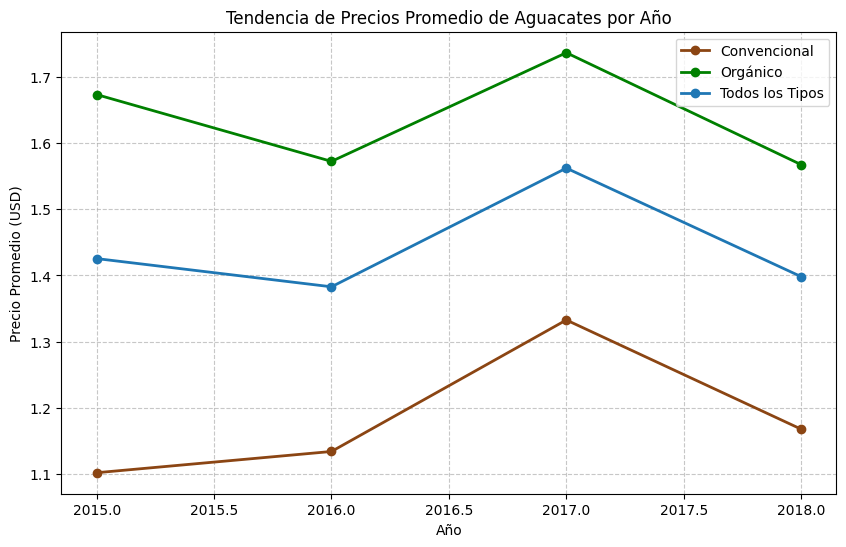

In [13]:
promedio_precio_por_año_conv=df[df['type']=='conventional']
promedio_precio_por_año_org=df[df['type']=='organic']
# Agrupo por año y calculo el promedio de AveragePrice
promedio_precio_por_año_conv = promedio_precio_por_año_conv.groupby('year')['AveragePrice'].mean()
promedio_precio_por_año_org = promedio_precio_por_año_org.groupby('year')['AveragePrice'].mean()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de líneas para cada tipo de aguacate
plt.plot(promedio_precio_por_año_conv.index, promedio_precio_por_año_conv.values, marker='o', color='saddlebrown', linestyle='-', linewidth=2, label='Convencional')
plt.plot(promedio_precio_por_año_org.index, promedio_precio_por_año_org.values, marker='o', color='green', linestyle='-', linewidth=2, label='Orgánico')
plt.plot(promedio_precio_por_año.index, promedio_precio_por_año.values, marker='o', linestyle='-', linewidth=2, label='Todos los Tipos')

# Configurar el gráfico
plt.title('Tendencia de Precios Promedio de Aguacates por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

**4. Análisis de Cohortes**

<ipython-input-14-4dfc92fe6451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols_cohor['Date'] = pd.to_datetime(cols_cohor['Date'])


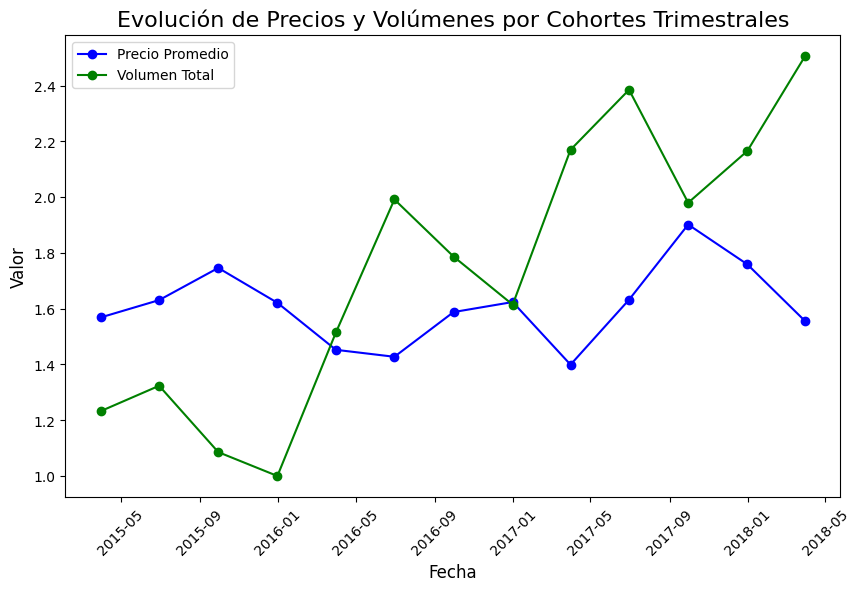

In [14]:

cols_cohor = select_region[['AveragePrice','Total Volume','Date']]
cols_cohor['Date'] = pd.to_datetime(cols_cohor['Date'])
# Agrupar por trimestre y calcular el promedio de AveragePrice y la suma de Total Volume
cohortes_trimestrales = cols_cohor.groupby(pd.Grouper(key='Date', freq='QE')).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
})

# Reducir la escala de Total Volume a miles de millones
cohortes_trimestrales['Total Volume'] = cohortes_trimestrales['Total Volume'] / cohortes_trimestrales['Total Volume'].min()  # Dividir por 1 billón

plt.figure(figsize=(10, 6))

plt.plot(cohortes_trimestrales.index, cohortes_trimestrales['AveragePrice'], marker='o', label='Precio Promedio', color='blue')


plt.plot(cohortes_trimestrales.index, cohortes_trimestrales['Total Volume'], marker='o', label='Volumen Total', color='green')
plt.title('Evolución de Precios y Volúmenes por Cohortes Trimestrales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()



<ipython-input-15-a3b6ad5cebb4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_region['Date'] = pd.to_datetime(data['Date'])


<Figure size 8000x800 with 0 Axes>

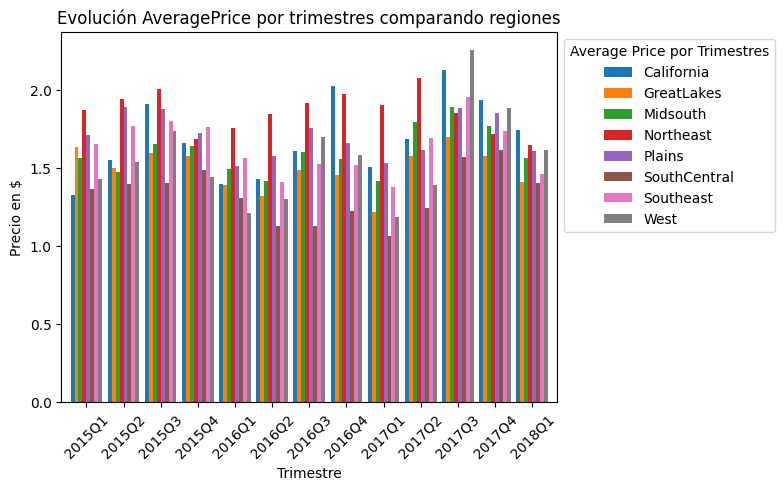

<Figure size 8000x800 with 0 Axes>

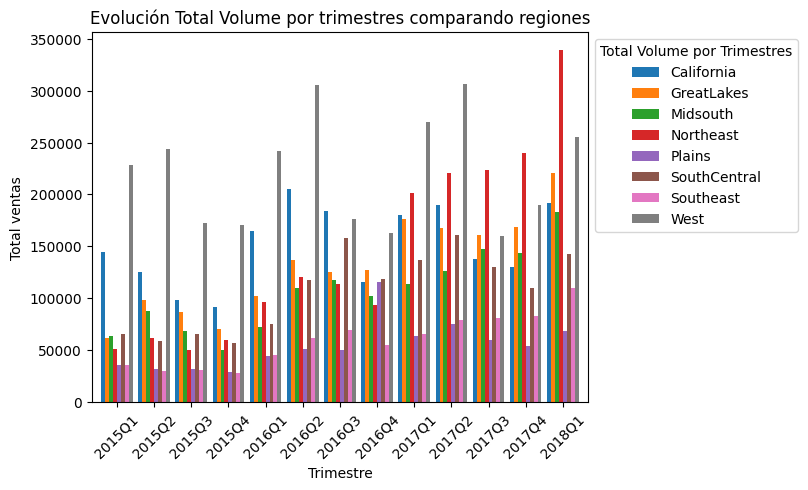

In [15]:
select_region_2 = select_region.copy()

select_region['Date'] = pd.to_datetime(data['Date'])
select_region_2['quarter'] = select_region['Date'].dt.to_period('Q')

# Agrupar los datos por región y fecha, calculando el promedio de AveragePrice y la suma de Total Volume
cohortes_regiones_AP = select_region_2.groupby(['quarter','region'])['AveragePrice'].mean().unstack()

cohortes_regiones_TV = select_region_2.groupby(['quarter','region'])['Total Volume'].mean().unstack()

plt.figure(figsize=(80,8))
cohortes_regiones_AP.plot(kind='bar', width=0.85)
plt.xticks(rotation=45)
plt.title("Evolución AveragePrice por trimestres comparando regiones")
plt.xlabel("Trimestre")
plt.ylabel("Precio en $")
plt.legend(title='Average Price por Trimestres', loc='upper left', bbox_to_anchor=(1, 1))


plt.figure(figsize=(80,8))
cohortes_regiones_TV.plot(kind='bar', width=0.85)
plt.xticks(rotation=45)
plt.title("Evolución Total Volume por trimestres comparando regiones")
plt.xlabel("Trimestre")
plt.ylabel("Total ventas")
plt.legend(title='Total Volume por Trimestres', loc='upper left', bbox_to_anchor=(1, 1))

<ipython-input-16-954d03bc3012>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_region['Date'] = pd.to_datetime(data['Date'])


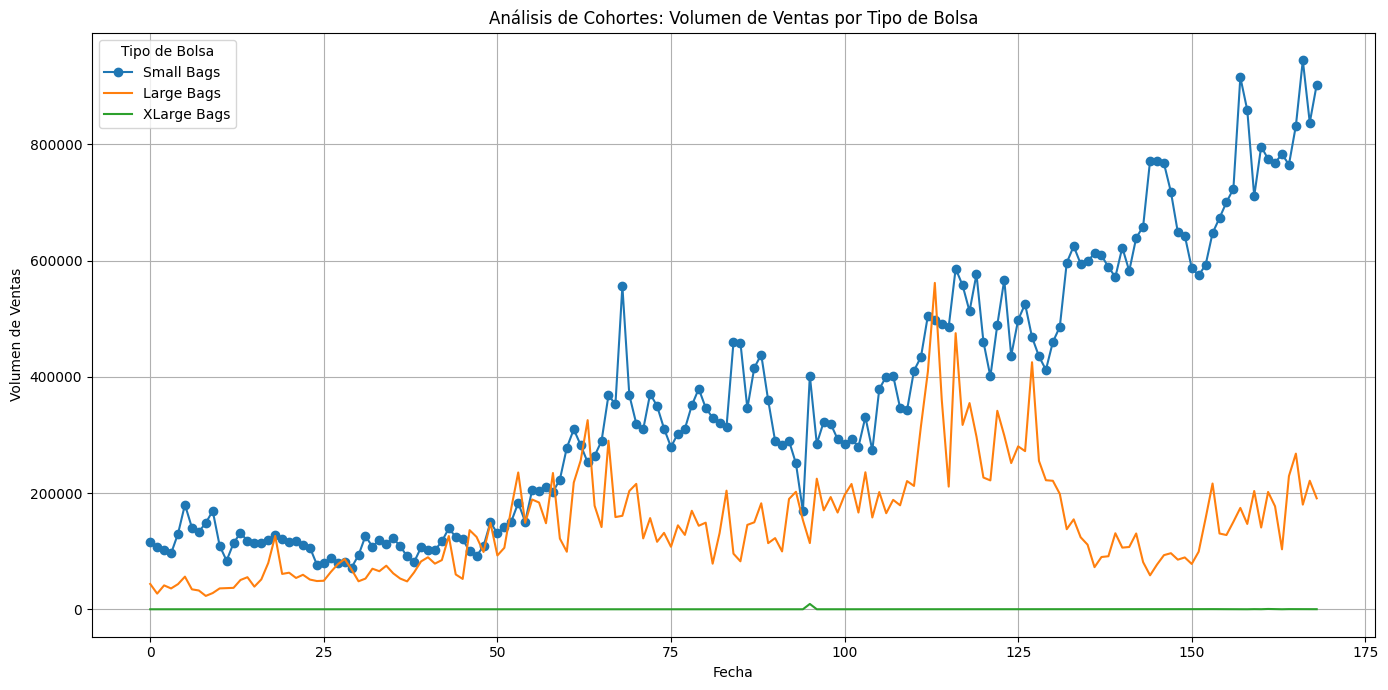

In [16]:
# Convertir la columna 'Date' al formato datetime para facilitar el análisis por tiempo
select_region['Date'] = pd.to_datetime(data['Date'])

# Agrupar datos por fecha y calcular el volumen total por tipo de bolsa
bag_cohorts = select_region.groupby('Date').agg({
    'Small Bags': 'sum',
    'Large Bags': 'sum',
    'XLarge Bags': 'sum'
}).reset_index()

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(bag_cohorts.index, bag_cohorts['Small Bags'], label='Small Bags', marker='o')
plt.plot(bag_cohorts.index, bag_cohorts['Large Bags'], label='Large Bags')
plt.plot(bag_cohorts.index, bag_cohorts['XLarge Bags'], label='XLarge Bags')

# Configuración del gráfico
plt.title('Análisis de Cohortes: Volumen de Ventas por Tipo de Bolsa')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Ventas')
plt.legend(title='Tipo de Bolsa')
plt.grid()
plt.tight_layout()
plt.show()


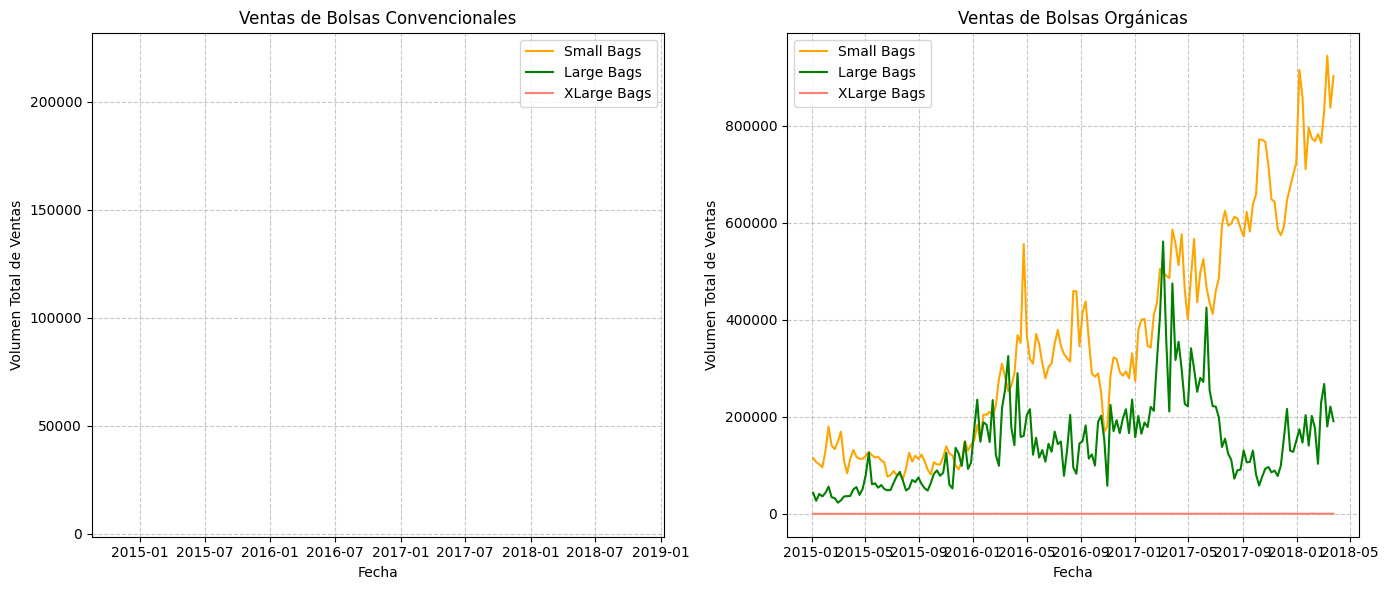

In [17]:
df_bolsas_type = select_region[['Small Bags','Large Bags','XLarge Bags','Date', 'type']]
df_bolsas_conv=df_bolsas_type[df_bolsas_type['type']=='conventional']
df_bolsas_org=df_bolsas_type[df_bolsas_type['type']=='organic']

df_bolsas_conv = df_bolsas_conv.groupby('Date').sum()
df_bolsas_org = df_bolsas_org.groupby('Date').sum()

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 6))

# Gráfico para las ventas convencionales
plt.subplot(1, 2, 1)  # Primer gráfico en una fila de 1x2
plt.plot(df_bolsas_conv.index, df_bolsas_conv['Small Bags'], label='Small Bags', color='orange')
plt.plot(df_bolsas_conv.index, df_bolsas_conv['Large Bags'], label='Large Bags', color='green')
plt.plot(df_bolsas_conv.index, df_bolsas_conv['XLarge Bags'], label='XLarge Bags', color='salmon')
plt.title('Ventas de Bolsas Convencionales')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico para las ventas orgánicas
plt.subplot(1, 2, 2)  # Segundo gráfico en una fila de 1x2
plt.plot(df_bolsas_org.index, df_bolsas_org['Small Bags'], label='Small Bags', color='orange')
plt.plot(df_bolsas_org.index, df_bolsas_org['Large Bags'], label='Large Bags', color='green')
plt.plot(df_bolsas_org.index, df_bolsas_org['XLarge Bags'], label='XLarge Bags', color='salmon')
plt.title('Ventas de Bolsas Orgánicas')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


<ipython-input-18-51b7aab0a7ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_region['Date'] = pd.to_datetime(data['Date'])
<ipython-input-18-51b7aab0a7ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(data['Date'])


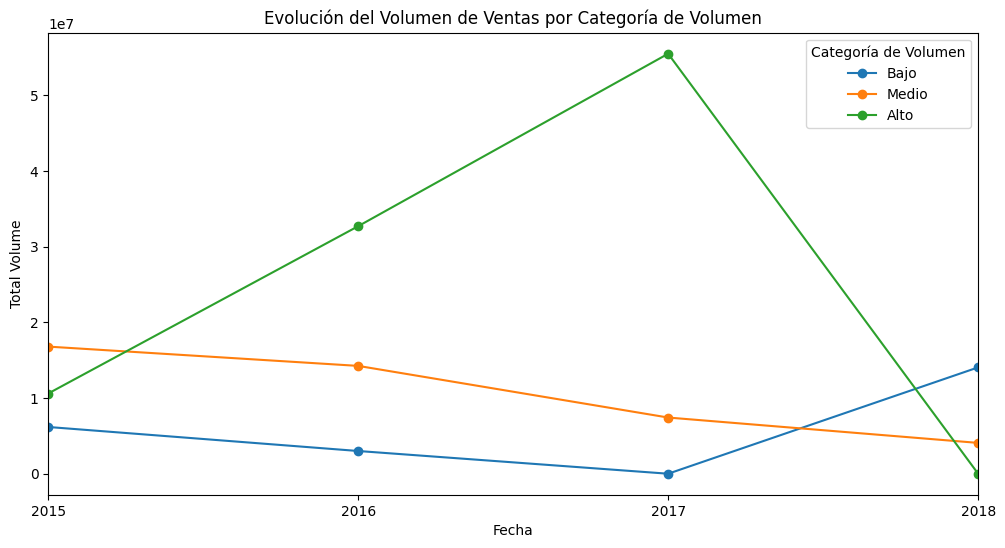

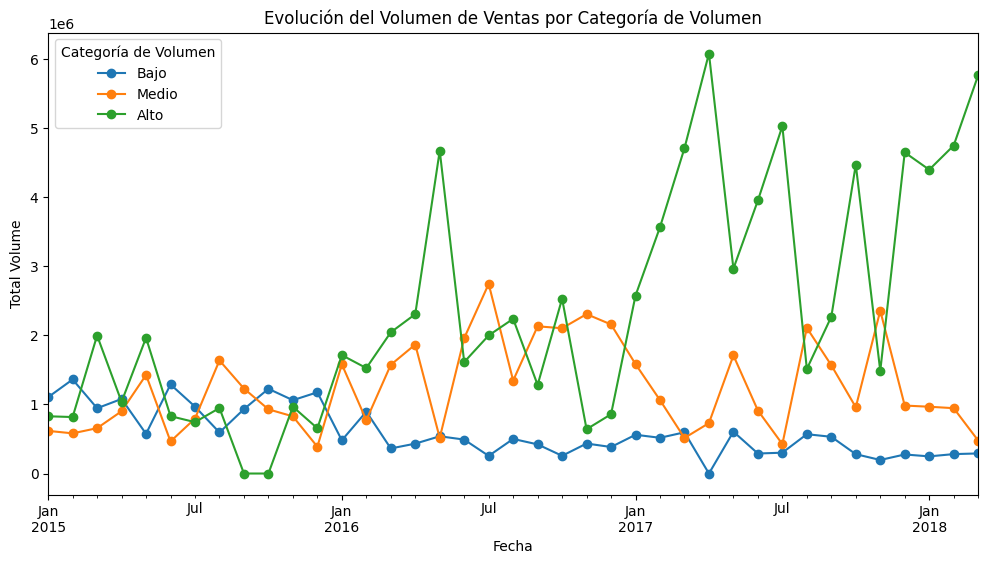

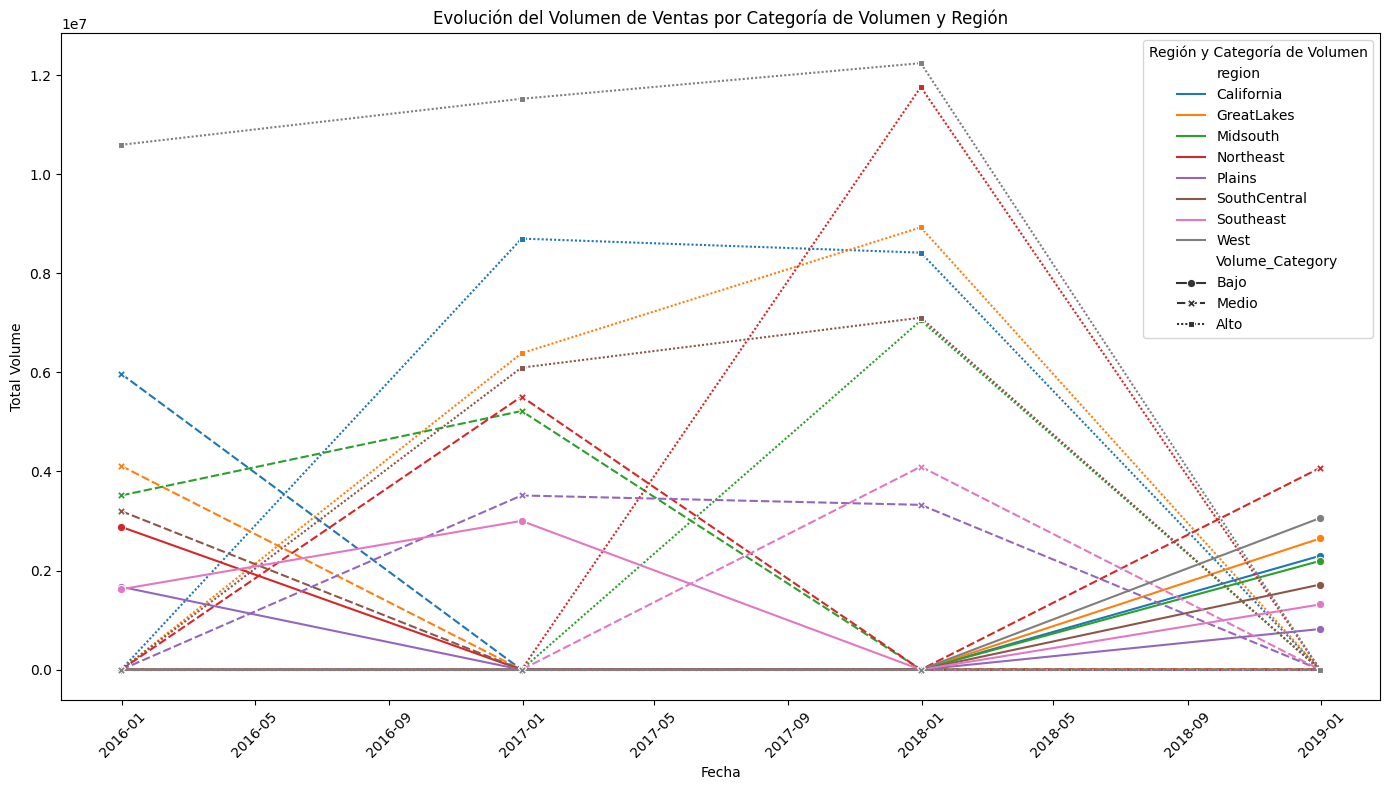

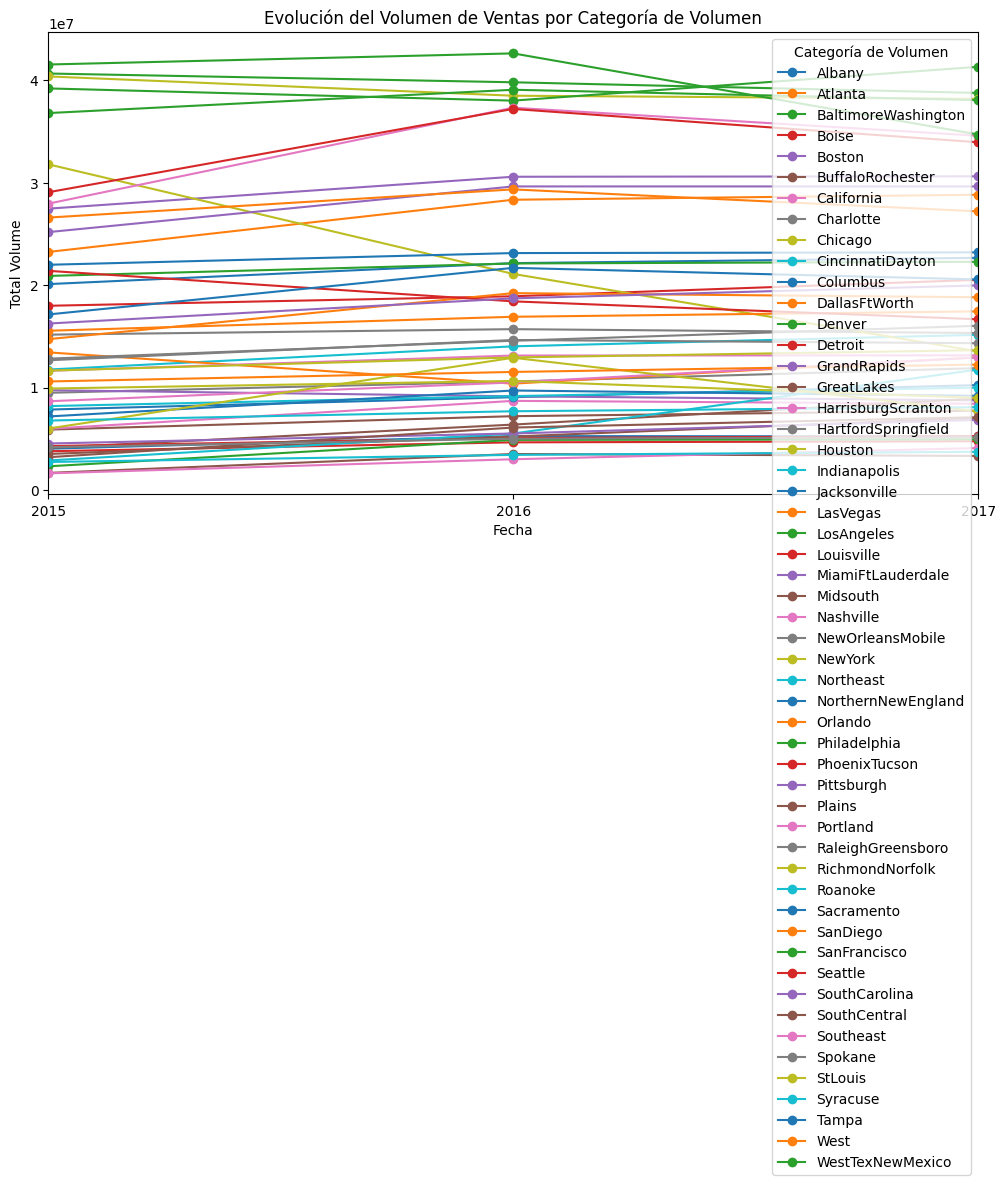

In [18]:
select_region['Date'] = pd.to_datetime(data['Date'])
df['Date'] = pd.to_datetime(data['Date'])

select_regions_3=select_region[['Total Volume', 'region', 'Date']].copy()
cohorte_volume1 = select_regions_3.groupby([pd.Grouper(key='Date', freq='YE'), 'region'])['Total Volume'].sum().reset_index()

cohorte_volume1['Volume_Category'] = pd.qcut(cohorte_volume1['Total Volume'], q=3, labels=['Bajo', 'Medio', 'Alto'])


# Pivot para tener cada combinación de región con volume_category en una columna con el valor de la total volume
cohorte_pivot = cohorte_volume1.pivot(index='Date', columns=['region', 'Volume_Category'], values='Total Volume')


# Gráfica de cada categoría de volumen
cohorte_volume1.groupby(['Date', 'Volume_Category'], observed=False)['Total Volume'].sum().unstack().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolución del Volumen de Ventas por Categoría de Volumen')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Categoría de Volumen')
plt.show()

select_regions_4=select_region[['Total Volume', 'region', 'Date']].copy()
cohorte_volume2 = select_regions_4.groupby([pd.Grouper(key='Date', freq='ME'), 'region'])['Total Volume'].sum().reset_index()

#Clasificar en categorías de volumen ( bajo, medio, alto usando q=3)
cohorte_volume2['Volume_Category'] = pd.qcut(cohorte_volume2['Total Volume'], q=3, labels=['Bajo', 'Medio', 'Alto'])


# Pivot para tener cada combinación de región con volume_category en una columna con el valor de la total volume
cohorte_pivot = cohorte_volume2.pivot(index='Date', columns=['region', 'Volume_Category'], values='Total Volume')


# Gráfica de cada categoría de volumen
cohorte_volume2.groupby(['Date', 'Volume_Category'], observed=False)['Total Volume'].sum().unstack().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolución del Volumen de Ventas por Categoría de Volumen')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Categoría de Volumen')
plt.show()


cohorte_grouped = cohorte_volume1.groupby(['Date', 'region', 'Volume_Category'],observed=False)['Total Volume'].sum().reset_index()

# Gráfico de línea que muestra el Total Volume por Volume_Category y región
plt.figure(figsize=(14, 8))
sns.lineplot(data=cohorte_grouped,
             x='Date',
             y='Total Volume',
             hue='region',
             style='Volume_Category',
             markers=True)

plt.title('Evolución del Volumen de Ventas por Categoría de Volumen y Región')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Región y Categoría de Volumen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df4 = df[(df['region']!='TotalUS') & (df['Date'].dt.year<=2017)].copy()
df4= df4[['Total Volume', 'region', 'Date']].copy()
#cohorte_volume1 = df4.groupby([pd.Grouper(key='Date', freq='YE'), 'region'])['Total Volume'].sum().reset_index()
coh_4 = df4.groupby([pd.Grouper(key='Date', freq='YE'), 'region'])['Total Volume'].sum().reset_index()

# #Clasificamos en categorías de volumen ( bajo, medio, alto, usando q=3) q divide en 3 partes iguales y a cada grupo le pone estas etiquetas
# cohorte_volume1['Volume_Category'] = pd.qcut(cohorte_volume1['Total Volume'], q=3, labels=['Bajo', 'Medio', 'Alto'])


# # Pivot para tener cada combinación de región con volume_category en una columna con el valor de la total volume
# cohorte_pivot = cohorte_volume1.pivot(index='Date', columns=['region', 'Volume_Category'], values='Total Volume')


# Gráfica de cada categoría de volumen
#cohorte_volume1.groupby(['Date', 'Volume_Category'], observed=False)['Total Volume'].sum().unstack().plot(kind='line', marker='o', figsize=(12, 6))
#cohorte_volume1.groupby(['Date', 'region'], observed=False)['Total Volume'].sum().unstack().plot(kind='line', marker='o', figsize=(12, 6))
coh_4.groupby(['Date', 'region'], observed=False)['Total Volume'].sum().unstack().plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Evolución del Volumen de Ventas por Categoría de Volumen')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend(title='Categoría de Volumen')
plt.show()




<ipython-input-19-0e5bac47ce99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume Cohort'] = pd.qcut(df['Total Volume'], q=3, labels=volume_labels)
<ipython-input-19-0e5bac47ce99>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cohort_volume_df = df.groupby([pd.Grouper(key='Date', freq='M'), 'region', 'Volume Cohort']).agg({
<ipython-input-19-0e5bac47ce99>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_volume_df = df.groupby([pd.Grouper(key='Date', freq='M'), 'region', 'Volume Cohort'

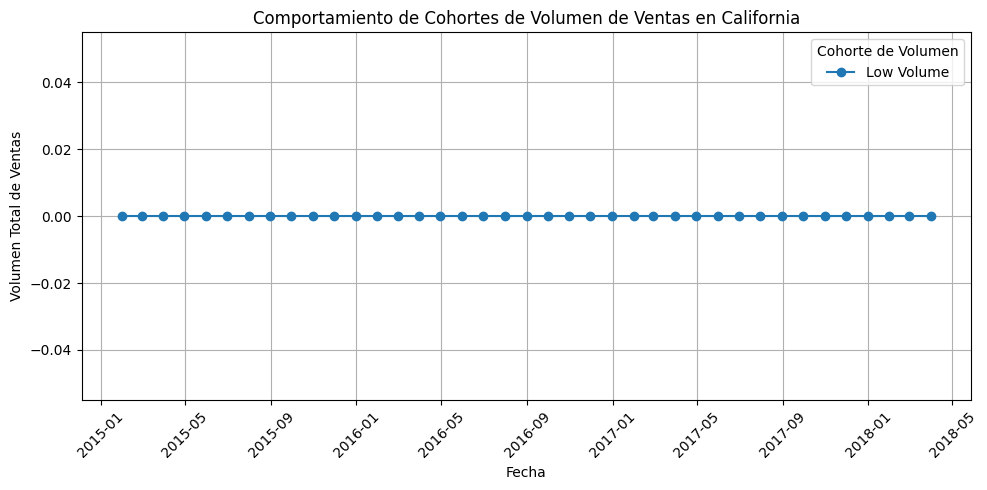

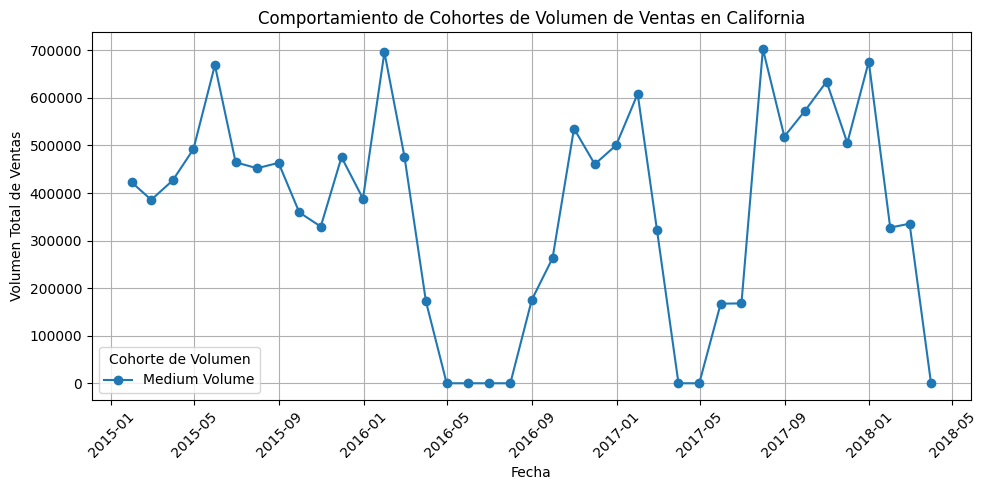

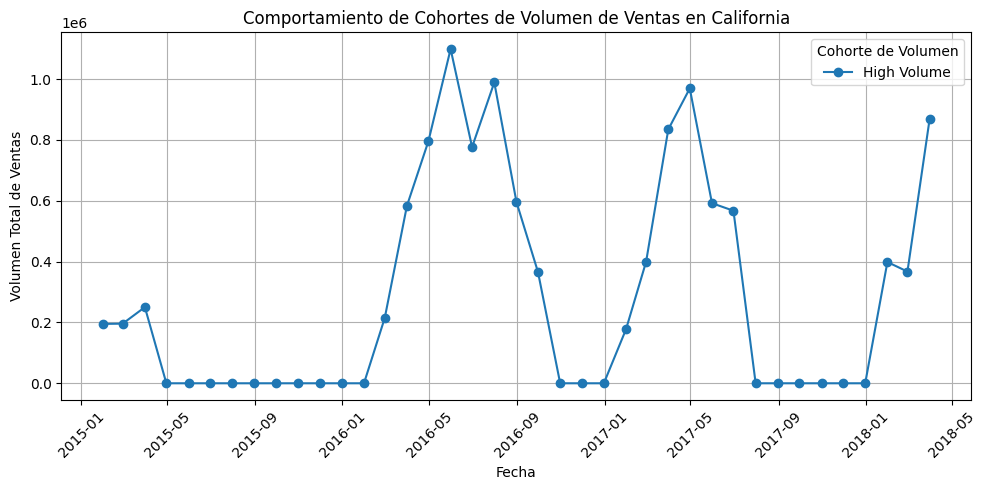

In [19]:
volume_labels = ['Low Volume', 'Medium Volume', 'High Volume']
df['Volume Cohort'] = pd.qcut(df['Total Volume'], q=3, labels=volume_labels)


cohort_volume_df = df.groupby([pd.Grouper(key='Date', freq='M'), 'region', 'Volume Cohort']).agg({
    'Total Volume': 'sum'
}).reset_index()


region_example = 'California'
region_data = cohort_volume_df[cohort_volume_df['region'] == region_example]


for cohort in volume_labels:
    plt.figure(figsize=(10, 5))
    cohort_data = region_data[region_data['Volume Cohort'] == cohort]
    plt.plot(cohort_data['Date'], cohort_data['Total Volume'], label=cohort, marker='o')

    plt.title(f'Comportamiento de Cohortes de Volumen de Ventas en {region_example}')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen Total de Ventas')
    plt.legend(title="Cohorte de Volumen")
    plt.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**5. Análisis de Correlación y Regresión**

1.

<ipython-input-20-8c57d533d29f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


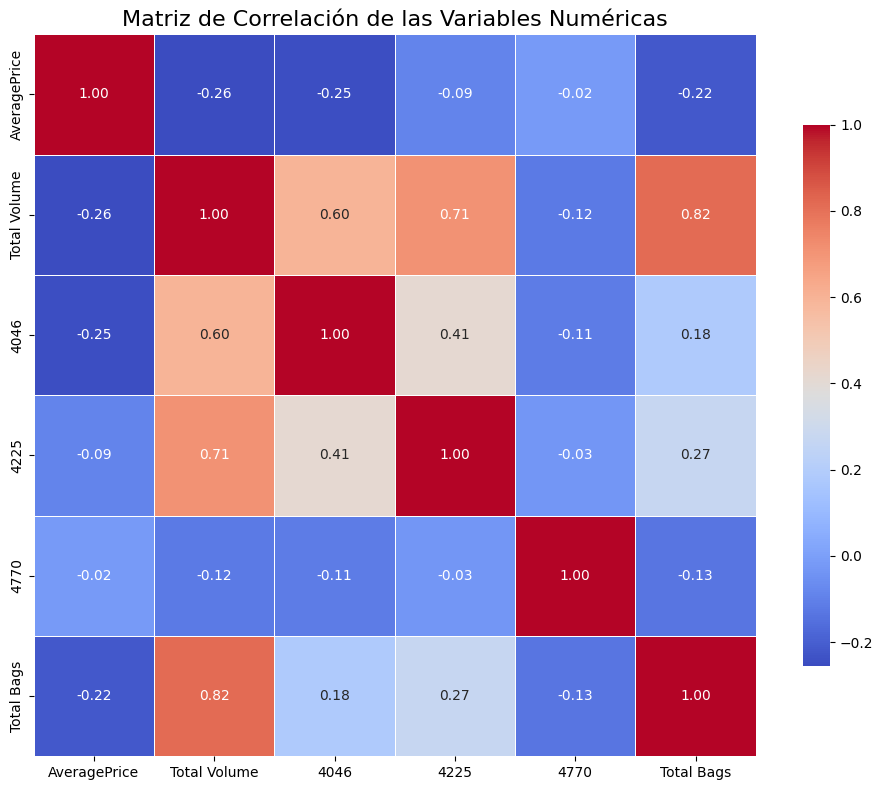

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
select_region_5 = df[df['category_region']=='GreaterRegion']
columnas_numericas = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']
#revisar
correlation_matrix = select_region_5[columnas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Muestra los valores numéricos en cada celda
    cmap='coolwarm',  # Colormap para la visualización
    fmt='.2f',  # Formato de los números
    linewidths=0.5,  # Grosor de las líneas de la cuadrícula
    square=True,  # Matriz cuadrada
    cbar_kws={"shrink": 0.75}  # Control del tamaño de la barra de colores
)

# Ajustar el diseño
plt.title('Matriz de Correlación de las Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

2.

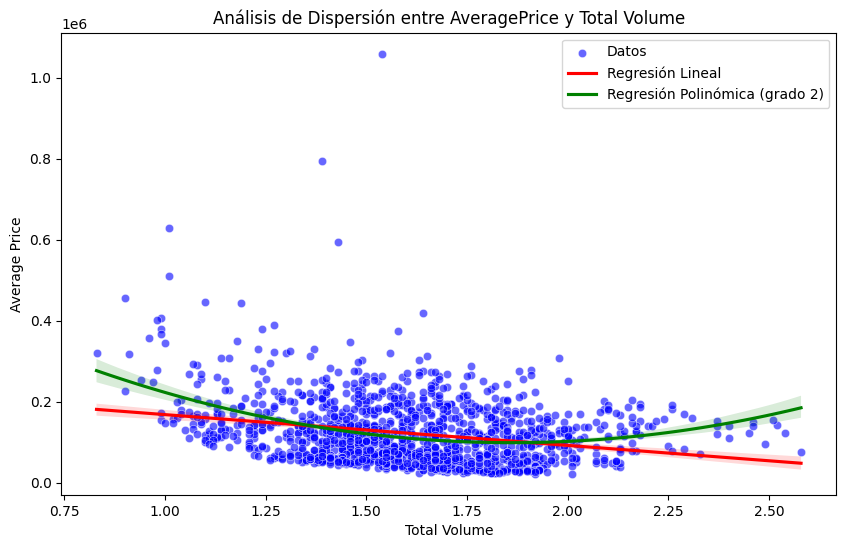

In [21]:
df_dispersion = select_region[['Total Volume','AveragePrice']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dispersion, y='Total Volume', x='AveragePrice', color='blue', alpha=0.6, label='Datos')

# Añadir línea de regresión lineal
sns.regplot(data=df_dispersion, y='Total Volume', x='AveragePrice', scatter=False, color='red', label='Regresión Lineal')

# Añadir línea de regresión polinómica de grado 2 (cuadrática)
sns.regplot(data=df_dispersion, y='Total Volume', x='AveragePrice', scatter=False, color='green', label='Regresión Polinómica (grado 2)', order=2)

# Títulos y etiquetas
plt.title('Análisis de Dispersión entre AveragePrice y Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

3.

In [22]:
#df['Date'] = pd.to_datetime(df['Date'])
df_predic = select_region[['Date','type','Total Volume', 'AveragePrice']]
df_prediction = df_predic.copy()

df_prediction['Date'] = pd.to_datetime(df_prediction['Date'])

df_order_date = df_prediction.sort_values(by='Date', ascending=True)

frist_year = df_order_date['Date'].dt.year.min()

df_filter = df_order_date[
    (df_order_date['Date'].dt.year == frist_year) &
    (df_order_date['Date'].dt.month <= 2)
]
df_filter_2 = df_order_date[
    (df_order_date['Date'].dt.year == frist_year) &
    (df_order_date['Date'].dt.month == 3)
]
X=df_filter[['Total Volume','AveragePrice']].drop(columns='AveragePrice')
y=df_filter['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=None)

model = LinearRegression()
model.fit(X_train, y_train)

print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Sobrescribir conjuntos de prueba X_test y y_test con los valores de nuestro 3r mes
X_test = df_filter_2[['Total Volume','AveragePrice']].drop(columns='AveragePrice')
y_test = df_filter_2['AveragePrice']

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos
# el **error porcentual**.

comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar
# el rendimiento del modelo.

mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")

Coeficientes:  [-2.0106816e-06]
Intercepto:  1.7408997984216332

Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        1.40        1.300645          7.096767
1        1.61        1.615555         -0.345033
2        1.70        1.666518          1.969547
3        1.69        1.617725          4.276612
4        1.46        1.645796        -12.725732
5        1.85        1.626693         12.070626
6        1.15        1.237629         -7.619917
7        1.34        1.578967        -17.833390
8        1.62        1.593614          1.628773
9        1.60        1.591802          0.512368

Error cuadrático medio (MSE) del modelo: 0.0260

Valor R² del modelo: 0.2236


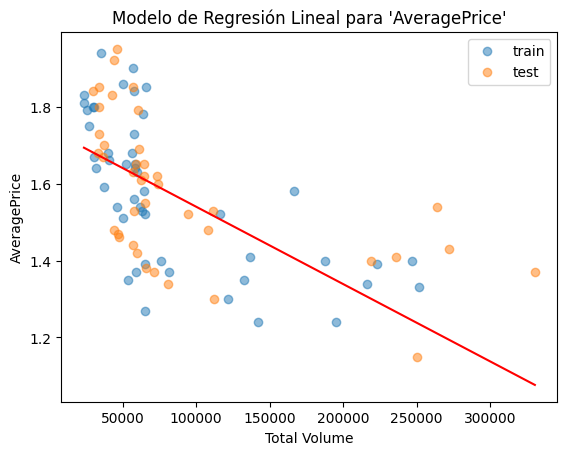

In [23]:
all_three_months = pd.concat([X, X_test], axis=0)
xmin, xmax = round(all_three_months['Total Volume'].min()), round(all_three_months['Total Volume'].max())

x_model = np.arange(xmin, xmax+1) # np.arange returns evenly spaced values within a given interval.
y_model=[model.intercept_+model.coef_*x for x in x_model]

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r');

plt.title('Modelo de Regresión Lineal para \'AveragePrice\'')
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.legend()
plt.show()

4.

In [24]:
predic_m = select_region.copy()
grup_m = predic_m.groupby(pd.Grouper(key='Date', freq='QE')).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'mean'
})
df_trimes = grup_m
X = []
y_avg_price = []
y_total_volume = []

for i in range(2, len(df_trimes)):
    # Dos trimestres anteriores
    X.append([df_trimes['AveragePrice'].iloc[i-1], df_trimes['AveragePrice'].iloc[i-2],
               df_trimes['Total Volume'].iloc[i-1], df_trimes['Total Volume'].iloc[i-2]])
    # Valor del trimestre a predecir
    y_avg_price.append(df_trimes['AveragePrice'].iloc[i])
    y_total_volume.append(df_trimes['Total Volume'].iloc[i])

X = pd.DataFrame(X, columns=['AvgPrice_T1', 'AvgPrice_T2', 'TotalVolume_T1', 'TotalVolume_T2'])

y_avg_price = pd.Series(y_avg_price)
y_total_volume = pd.Series(y_total_volume)

def train_and_evaluate_models(X, y):
    # Modelo Lineal
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)

    # Modelo Polinómico (grados 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    return y_pred_linear, y_pred_poly

# Ajustar y evaluar para AveragePrice
y_pred_linear_avg_price, y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)

# Ajustar y evaluar para Total Volume
y_pred_linear_total_volume, y_pred_poly_total_volume = train_and_evaluate_models(X, y_total_volume)


# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
#print("\nRMSE:", root_mean_squared_error(y_avg_price, y_pred_linear_avg_price))
print("\nMSE:", mean_squared_error(y_avg_price, y_pred_linear_avg_price))
print("R^2:", r2_score(y_avg_price, y_pred_linear_avg_price))

print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
#print("\nRMSE:", root_mean_squared_error(y_avg_price, y_pred_poly_avg_price))
print("\nMSE:", mean_squared_error(y_avg_price, y_pred_poly_avg_price))
print("R^2:", r2_score(y_avg_price, y_pred_poly_avg_price))

Evaluación para AveragePrice con modelo de Regresión Lineal

MSE: 0.0052709817314216725
R^2: 0.7508001197332943

Evaluación para AveragePrice con modelo de Regresión Polinómica

MSE: 1.775477604821397e-15
R^2: 0.9999999999999161


In [25]:
# Evaluar Total Volume
print("\nEvaluación para Total Volume con modelo de regresión Lineal:")
#print("\nRMSE:", root_mean_squared_error(y_total_volume, y_pred_linear_total_volume))
print("\nMSE:", mean_squared_error(y_total_volume, y_pred_linear_total_volume))
print("R^2:", r2_score(y_total_volume, y_pred_linear_total_volume))

print("\nEvaluación para Total Volume con modelo de regresión Polinómica:")
#print("\nRMSE:", root_mean_squared_error(y_total_volume, y_pred_poly_total_volume))
print("\nMSE:", mean_squared_error(y_total_volume, y_pred_poly_total_volume))
print("R^2:", r2_score(y_total_volume, y_pred_poly_total_volume))


Evaluación para Total Volume con modelo de regresión Lineal:

MSE: 124889174.32605547
R^2: 0.8941966587648144

Evaluación para Total Volume con modelo de regresión Polinómica:

MSE: 0.00036665387983520116
R^2: 0.9999999999996894


5.

In [26]:
anual = predic_m.groupby(pd.Grouper(key='Date', freq='YE')).agg({
    'AveragePrice':'mean',
    'Total Volume':'mean'
})
X = []
y_avg_price = []
y_total_volume = []
anual


for i in range(2, len(anual)):
  #dos trimestres
  X.append([anual['AveragePrice'].iloc[i-1], anual['AveragePrice'].iloc[i-2],
            anual['Total Volume'].iloc[i-1], anual['Total Volume'].iloc[i-2]])

  #valor a predecir (trimestre)
  y_avg_price.append(anual['AveragePrice'].iloc[i])
  y_total_volume.append(anual['Total Volume'].iloc[i])

X = pd.DataFrame(X, columns=['AvgPriceY_1','AvgPriceY_2','TotalY_1','TotalVY_2'])
y_avg_price = pd.Series(y_avg_price)
y_total_volume = pd.Series(y_total_volume)

#entrenar y evaluar
def train_and_evaluate_models(X, y):
  #lineal
  linear_model = LinearRegression()
  linear_model.fit(X,y)
  y_pred_linear = linear_model.predict(X)

  #Grado 2
  poly = PolynomialFeatures(degree=2)
  X_poly = poly.fit_transform(X)
  poly_model = LinearRegression()
  poly_model.fit(X_poly, y)
  y_pred_ploy = poly_model.predict(X_poly)

  return y_pred_linear, y_pred_ploy

y_pred_linear_avg_price, y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)
y_pred_linear_total_volume, y_pred_poly_total_volume = train_and_evaluate_models(X, y_total_volume)

In [27]:
#Evaluar Total Volume y Average Price

#Average Price
print("Evaluación Average Price lineal")
rmse_linear_avg_price = root_mean_squared_error(y_avg_price, y_pred_linear_avg_price)
r2_linear_avg_price = r2_score(y_avg_price, y_pred_linear_avg_price)
print("RMSE: ", rmse_linear_avg_price)
print("R^2: ", r2_linear_avg_price)

print("Evaluación Average Price poly")
rmse_poly_avg_price  = root_mean_squared_error(y_avg_price, y_pred_poly_avg_price)
r2_poly_avg_price  = r2_score(y_avg_price, y_pred_poly_avg_price)
print("RMSE: ", rmse_poly_avg_price)
print("R^2: ", r2_poly_avg_price )


#Total Volume
print("Evaluación Total Volume lineal")
rmse_linear_total_volume = root_mean_squared_error(y_total_volume, y_pred_linear_total_volume)
r2_linear_total_volume = r2_score(y_total_volume, y_pred_linear_total_volume)
print("RMSE: ", rmse_linear_total_volume)
print("R^2: ", r2_linear_total_volume)

print("Evaluación Total Volume poly")
rmse_poly_total_volume = root_mean_squared_error(y_total_volume, y_pred_poly_total_volume)
r2_poly_total_volume = r2_score(y_total_volume, y_pred_poly_total_volume)
print("RMSE: ", rmse_poly_total_volume)
print("R^2: ", r2_poly_total_volume)

Evaluación Average Price lineal
RMSE:  1.5700924586837752e-16
R^2:  1.0
Evaluación Average Price poly
RMSE:  2.220446049250313e-16
R^2:  1.0
Evaluación Total Volume lineal
RMSE:  2.0579515874459978e-11
R^2:  1.0
Evaluación Total Volume poly
RMSE:  0.0
R^2:  1.0


6.

In [28]:
reg_mult = select_region[['Total Volume','4046','4225','4770','Total Bags','AveragePrice']]
reg_mult = reg_mult.copy()

X=reg_mult[['Total Volume','4046','4225','4770','Total Bags']]
y=reg_mult['AveragePrice']


#entrenar y evaluar
def train_and_evaluate_models(X, y):
  #lineal
  linear_model = LinearRegression()
  linear_model.fit(X,y)
  y_pred_linear = linear_model.predict(X)

  pesos_lineal = linear_model.coef_
  intercept_lineal = linear_model.intercept_

  #Grado 2
  poly = PolynomialFeatures(degree=2)
  X_poly = poly.fit_transform(X)
  poly_model = LinearRegression()
  poly_model.fit(X_poly, y)
  y_pred_ploy = poly_model.predict(X_poly)

  pesos_poly = poly_model.coef_
  intercept_poly = poly_model.intercept_


  feature_names = poly.get_feature_names_out(X.columns)

  return y_pred_linear, y_pred_ploy, pesos_lineal, pesos_poly, intercept_lineal, intercept_poly, feature_names

y_pred_linear, y_pred_poly, pesos_lineal, pesos_poly, intercept_lineal, intercept_poly, feature_names = train_and_evaluate_models(X, y)

In [29]:
# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
print("\nRMSE:", mean_squared_error(y, y_pred_linear))
print("R^2:", r2_score(y, y_pred_linear))

print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
print("\nRMSE:", mean_squared_error(y, y_pred_poly))
print("R^2:", r2_score(y, y_pred_poly))

Evaluación para AveragePrice con modelo de Regresión Lineal

RMSE: 0.06649313932413517
R^2: 0.09968262149007179

Evaluación para AveragePrice con modelo de Regresión Polinómica

RMSE: 0.05495900315361405
R^2: 0.2558548724316193


7.

In [30]:
print("Print Pesos lineal y Polinómico")
print("Peso lineal: ",pesos_lineal)
print("Intercept: ",intercept_lineal)
print("\n")
print("Peso Polinómico: ",pesos_poly)
print("Intercept: ",intercept_poly)

Print Pesos lineal y Polinómico
Peso lineal:  [-2.92906565e-05  2.66312439e-05  2.98225302e-05  1.51295813e-05
  2.82751825e-05]
Intercept:  1.7132607432028188


Peso Polinómico:  [ 0.00000000e+00 -1.70205315e-04  1.64189549e-04  1.70632099e-04
  1.19630943e-04  1.69790027e-04 -3.29988671e-08 -5.68609156e-08
  7.67019694e-08  1.31408967e-05  6.61755905e-08  8.98140206e-08
  4.63035595e-08 -1.30188705e-05  5.66617940e-08 -4.37476500e-08
 -1.31517691e-05 -7.68740884e-08 -1.31064882e-05 -1.31403161e-05
 -3.31792990e-08]
Intercept:  1.7834716472819565


In [31]:
pd.DataFrame({'Feature': feature_names, 'Coefficient': pesos_poly})

,Feature,Coefficient
0,1,0.000000e+00
1,Total Volume,-1.702053e-04
2,4046,1.641895e-04
3,4225,1.706321e-04
4,4770,1.196309e-04
5,Total Bags,1.697900e-04
6,Total Volume^2,-3.299887e-08
7,Total Volume 4046,-5.686092e-08
8,Total Volume 4225,7.670197e-08
9,Total Volume 4770,1.314090e-05


8.

In [32]:
dif_volume = select_region[['AveragePrice','Total Volume','4046','4225','4770']]
dif_volume = dif_volume.copy()

X=dif_volume[['Total Volume','4046','4225','4770']]
y=dif_volume['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculo MSE y R^2 para el modelo de regresión lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Modelo de Regresión Polinómica
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Ajusto el modelo de regresión polinómica
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculo MSE y R^2 para el modelo de regresión polinómica
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)




In [33]:
# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
print("\nRMSE:", mse_linear)
print("R^2:", r2_linear)

print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
print("\nRMSE:", mse_poly)
print("R^2:", r2_poly)

Evaluación para AveragePrice con modelo de Regresión Lineal

RMSE: 0.06346506249851637
R^2: 0.12579354756981986

Evaluación para AveragePrice con modelo de Regresión Polinómica

RMSE: 0.05428889470708302
R^2: 0.2521916755483522


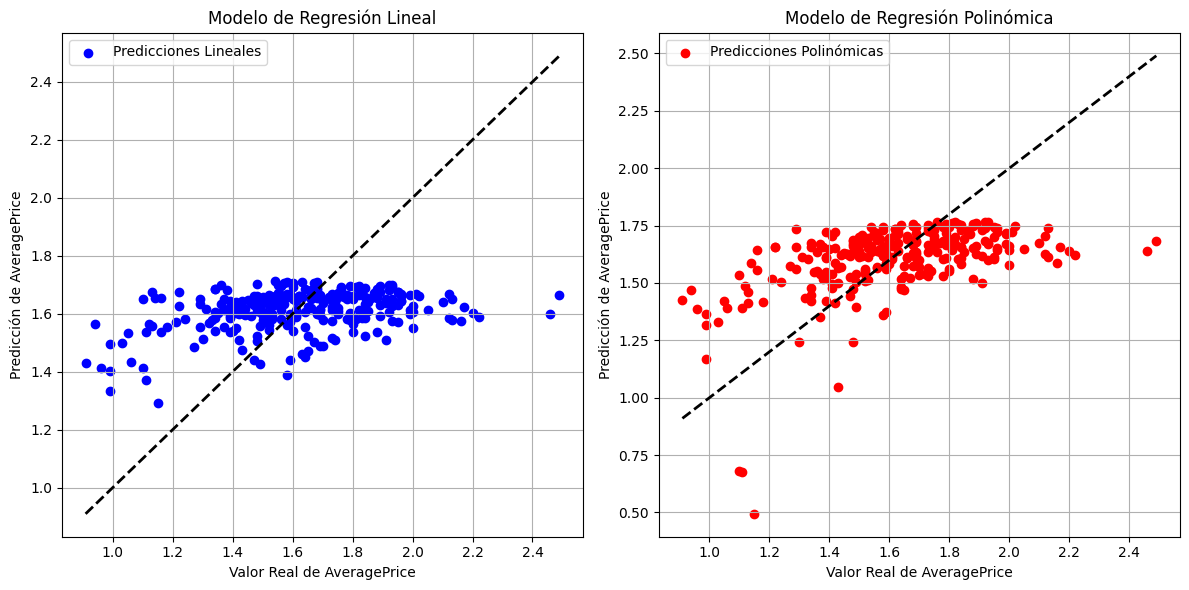

In [34]:

plt.figure(figsize=(12, 6))

# Gráfico de dispersión de precios promedio vs predicciones lineales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicciones Lineales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valor Real de AveragePrice")
plt.ylabel("Predicción de AveragePrice")
plt.title("Modelo de Regresión Lineal")
plt.legend()
plt.grid(True)

# Gráfico de dispersión de precios promedio vs predicciones polinómicas
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='red', label='Predicciones Polinómicas')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valor Real de AveragePrice")
plt.ylabel("Predicción de AveragePrice")
plt.title("Modelo de Regresión Polinómica")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


9.

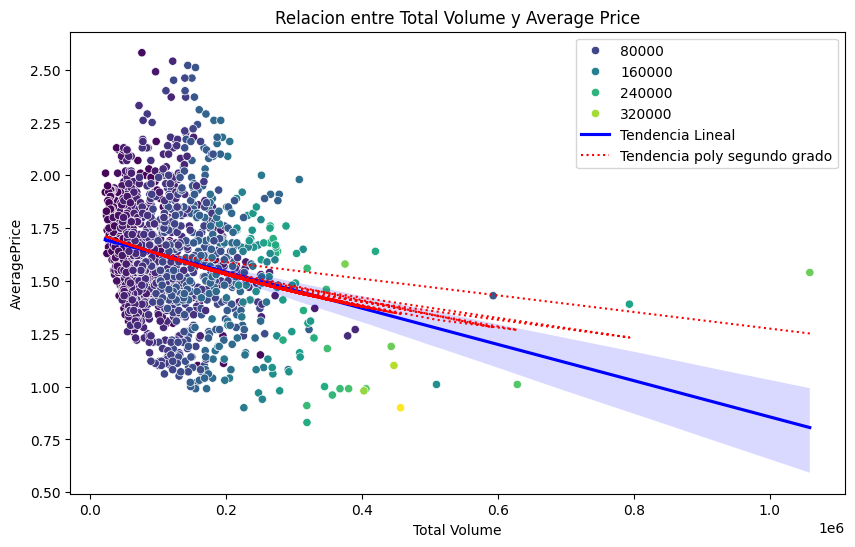

In [35]:
df = select_region[['Total Volume','Total Bags','AveragePrice']]
df = df.copy()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Total Volume',y='AveragePrice',hue='Total Bags', palette='viridis')
plt.title("Relacion entre Total Volume y Average Price")
plt.xlabel("Total Volume")
plt.ylabel("Average Price")

sns.regplot(data=df, x='Total Volume',y='AveragePrice', scatter=False, color='blue', label='Tendencia Lineal')

#Polinómico segundo grado
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Total Volume']])
poly_model = LinearRegression().fit(X_poly,df['AveragePrice'])
df['Pred_poly'] = poly_model.predict(X_poly)

plt.plot(df['Total Volume'],df['Pred_poly'], color='red', linestyle='dotted', label="Tendencia poly segundo grado")

plt.legend()
plt.show()

In [36]:
X=select_region[['Total Volume','Total Bags']]
y=select_region['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

#coeficientes
print("intercepto L: ",linear_model.intercept_)
print("Pesos L: ",linear_model.coef_)

#Evaluación modelo
mse_linear = mean_squared_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("MSE: ", mse_linear)
print("R2: ",r2_linear)
print("\n")
#modelo polinómico
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
#ajuste
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)
y_pred_poly = poly_model.predict(X_test_poly)
#coeficientes
print("intercepto P: ",poly_model.intercept_)
print("Pesos P: ",poly_model.coef_)

#Evaluación modelo
mse_poly = mean_squared_error(y_test,y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("MSE: ",mse_poly)
print("R2: ",r2_poly)

intercepto L:  1.7095654175877222
Pesos L:  [-7.41652802e-07 -1.86227830e-07]
MSE:  0.06754726866459164
R2:  0.0695627517580818


intercepto P:  1.717289360116842
Pesos P:  [ 0.00000000e+00 -1.48413909e-06  1.29341684e-06  2.82793420e-12
 -8.11227507e-12  2.80168695e-12]
MSE:  0.06651420107313685
R2:  0.0837928544112918


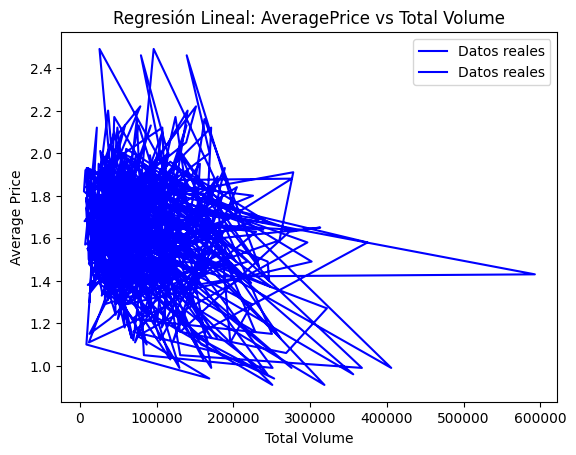

In [37]:
plt.plot(X_test, y_test, color='blue', label='Datos reales')
'''plt.plot(X_test, y_pred_linear, color='red', label='Regresión Lineal')'''
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.title('Regresión Lineal: AveragePrice vs Total Volume')
plt.legend()
plt.show()

ValueError: x and y must be the same size

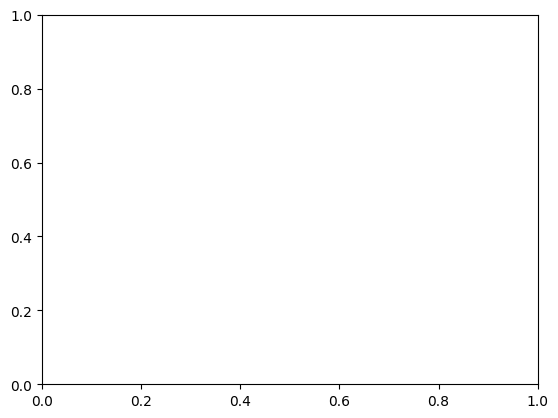

In [38]:
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicciones Polinómicas')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.title('Regresión Polinómica: AveragePrice vs Total Volume')
plt.legend()
plt.show()

10.

In [39]:
X=select_region[['4046','4225','4770','Total Volume']]
y=select_region['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

#coeficientes
print("intercepto L: ",linear_model.intercept_)
print("Pesos L: ",linear_model.coef_)

#Evaluación modelo
mse_linear = mean_squared_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("MSE: ", mse_linear)
print("R2: ",r2_linear)
print("\n")
#modelo polinómico
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
#ajuste
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)
y_pred_poly = poly_model.predict(X_test_poly)
#coeficientes
print("intercepto P: ",poly_model.intercept_)
print("Pesos P: ",poly_model.coef_)

#Evaluación modelo
mse_poly = mean_squared_error(y_test,y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("MSE: ",mse_poly)
print("R2: ",r2_poly)

intercepto L:  1.7058698409811242
Pesos L:  [-1.41042716e-06  1.49821277e-06 -1.06272143e-05 -1.00190665e-06]
MSE:  0.06346506249851637
R2:  0.12579354756981986


intercepto P:  1.7907713750010106
Pesos P:  [ 0.00000000e+00 -5.80907183e-06  1.07364255e-06 -4.49020701e-05
 -6.15741394e-07 -3.58991133e-11  1.51937444e-10 -1.55808086e-09
 -1.08081862e-11 -5.47564360e-11 -1.15502634e-09  1.13734844e-11
  8.62747853e-10  8.05468390e-10 -2.31062478e-12]
MSE:  0.05428889470795754
R2:  0.25219167553630606


In [40]:
# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
print("\nMSE:", mean_squared_error(y, y_pred_linear))
print("R^2:", r2_score(y, y_pred_linear))

print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
print("\nMSE:", mean_squared_error(y, y_pred_poly))
print("R^2:", r2_score(y, y_pred_poly))

Evaluación para AveragePrice con modelo de Regresión Lineal


ValueError: Found input variables with inconsistent numbers of samples: [1353, 271]